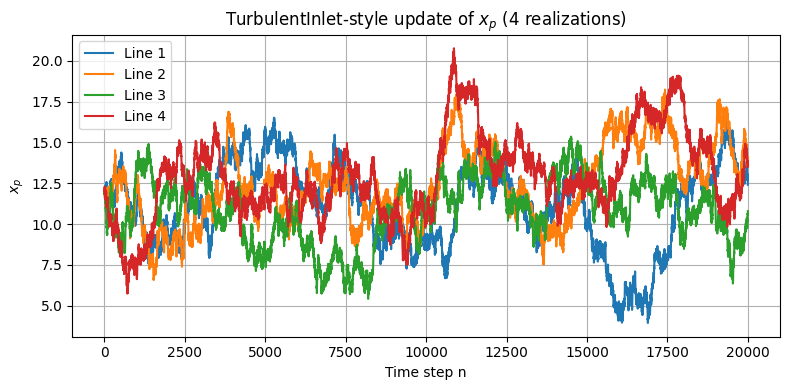

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
alpha = 0.001           # 递推系数，对应 turbulentInlet 的 alpha
x_ref = 12             # 参考值
s = 0.2                # fluctuationScale，扰动比例
n_steps = 20000         # 时间步数量
n_lines = 4            # 绘制的曲线数量

# # 参数设置
# alpha = 0.1           # 递推系数，对应 turbulentInlet 的 alpha
# x_ref = 10             # 参考值
# s = 0.02                # fluctuationScale，扰动比例
# n_steps = 2000         # 时间步数量
# n_lines = 4            # 绘制的曲线数量

# 计算 RMS 校正因子（与 OpenFOAM 一致）
rmsCorr = np.sqrt(12 * (2 * alpha - alpha**2)) / alpha

# 设置图形
plt.figure(figsize=(8, 4))

# 生成并绘制多条 x_p 曲线
for i in range(n_lines):
    # np.random.seed(42 + i)  # 可选固定随机种子
    random_r = np.random.rand(n_steps)  # 生成 [0,1] 区间随机扰动

    x_p = np.zeros(n_steps)
    x_p[0] = x_ref

    for n in range(1, n_steps):
        perturbation = rmsCorr * (random_r[n] - 0.5) * s * abs(x_ref)
        x_p[n] = (
            (1 - alpha) * x_p[n - 1]
            + alpha * (x_ref + perturbation)
        )

    plt.plot(range(n_steps), x_p, label=f'Line {i+1}')

# 添加图例与标签
plt.xlabel('Time step n')
plt.ylabel('$x_p$')
plt.title('TurbulentInlet-style update of $x_p$ (4 realizations)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


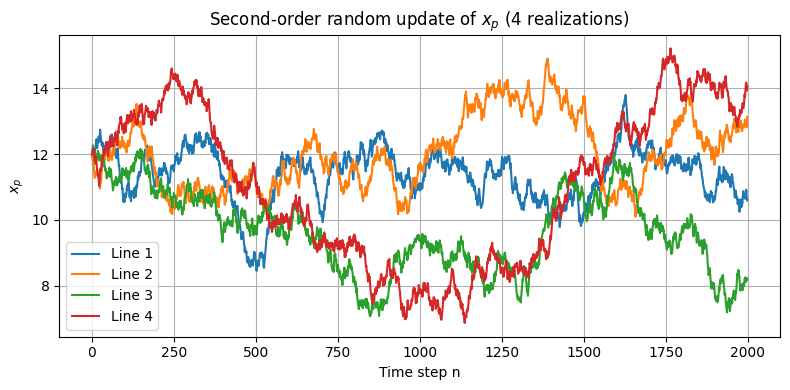

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
alpha = 0.001         # 一阶系数
beta = 0.001          # 二阶系数
x_ref = 12            # 参考值
s = 0.2               # fluctuationScale，扰动尺度 (s * |x_ref|)
n_steps = 2000      # 时间步数量
n_lines = 4           # 绘制的曲线数量

# 计算 RMS 校正因子
rmsCorr = np.sqrt(12 * (2 * alpha - alpha**2)) / alpha

# 设置图形
plt.figure(figsize=(8, 4))

# 生成并绘制多条 x_p 曲线
for i in range(n_lines):
    # np.random.seed(42 + i)  # 可选不同随机种子
    random_r = np.random.rand(n_steps)  # [0, 1] 区间

    x_p = np.zeros(n_steps)
    x_p[0] = x_ref
    x_p[1] = x_ref

    for n in range(2, n_steps):
        perturbation = rmsCorr * (random_r[n] - 0.5) * s * abs(x_ref)
        x_p[n] = (
            (1 - alpha - beta) * x_p[n-1]
            + beta * x_p[n-2]
            + alpha * (x_ref + perturbation)
        )

    plt.plot(range(n_steps), x_p, label=f'Line {i+1}')

# 添加图例与标签
plt.xlabel('Time step n')
plt.ylabel('$x_p$')
plt.title('Second-order random update of $x_p$ (4 realizations)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


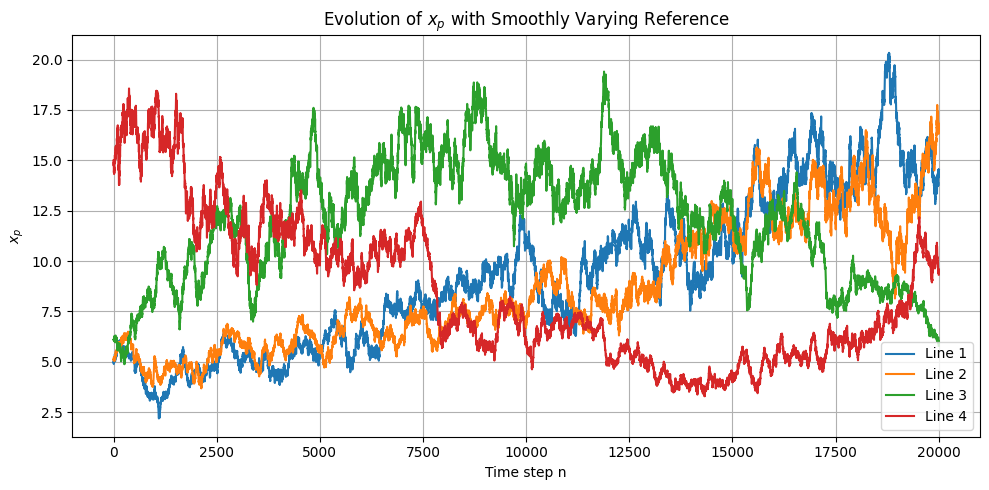

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
alpha = 0.002           # 当前扰动权重
C_RMS = 5               # 波动强度
n_steps = 20000          # 时间步数量
n_lines = 4             # 曲线数量

# 生成缓慢波动的参考曲线 x_ref[n]，使用低频正弦叠加
def generate_slow_varying_ref(n_steps, n_terms=3):
    t = np.linspace(0, 1, n_steps)
    y = np.zeros_like(t)
    for _ in range(n_terms):
        A = np.random.uniform(3, 8)             # 振幅控制
        f = np.random.uniform(0.1, 0.5)         # 低频
        phi = np.random.uniform(0, 2*np.pi)     # 随机相位
        y += A * np.sin(2 * np.pi * f * t + phi)
    y = y - np.min(y)                           # 平移为正
    y = 5 + 10 * y / np.max(y)                  # 缩放到 [5, 15]
    return y

# 设置图形
plt.figure(figsize=(10, 5))

# 生成并绘制多条 x_p 曲线
for i in range(n_lines):
    random_noise = np.random.randn(n_steps)
    x_ref = generate_slow_varying_ref(n_steps)  # 每条曲线一个不同的参考函数

    x_p = np.zeros(n_steps)
    x_p[0] = x_ref[0]
    x_p[1] = x_ref[1]

    for n in range(2, n_steps):
        fluctuation = C_RMS * x_ref[n] * random_noise[n]
        x_p[n] = (1 - alpha) * x_p[n-1] + alpha * (x_ref[n] + fluctuation)

    plt.plot(range(n_steps), x_p, label=f'Line {i+1}')

# 图像修饰
plt.xlabel('Time step n')
plt.ylabel('$x_p$')
plt.title('Evolution of $x_p$ with Smoothly Varying Reference')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


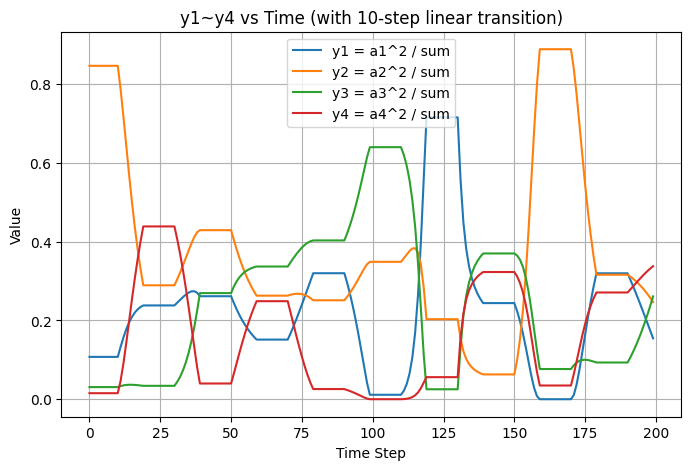

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 参数
time_steps = 200           # 总时间步数
block_size = 10            # 随机值保持的时间（不包括过渡）
transition_size = 10       # 线性过渡时间
segment_size = block_size + transition_size  # 一个周期的长度
t = np.arange(time_steps)  # 时间序列

# 生成每个段的随机值
num_segments = time_steps // segment_size + 2  # 需要多一个随机值用于过渡
rand_a1 = np.random.rand(num_segments)
rand_a2 = np.random.rand(num_segments)
rand_a3 = np.random.rand(num_segments)
rand_a4 = np.random.rand(num_segments)

# 构造随时间变化的 a1~a4
a1 = np.zeros(time_steps)
a2 = np.zeros(time_steps)
a3 = np.zeros(time_steps)
a4 = np.zeros(time_steps)

for i in range(num_segments - 1):
    start = i * segment_size
    mid = start + block_size
    end = min(start + segment_size, time_steps)
    
    # 区间内分段：前 block_size 步为常值
    if mid < time_steps:
        a1[start:mid] = rand_a1[i]
        a2[start:mid] = rand_a2[i]
        a3[start:mid] = rand_a3[i]
        a4[start:mid] = rand_a4[i]
    
    # 过渡段：线性插值到下一段的值
    if end > mid:
        tau = np.linspace(0, 1, end - mid)
        a1[mid:end] = rand_a1[i] + (rand_a1[i + 1] - rand_a1[i]) * tau
        a2[mid:end] = rand_a2[i] + (rand_a2[i + 1] - rand_a2[i]) * tau
        a3[mid:end] = rand_a3[i] + (rand_a3[i + 1] - rand_a3[i]) * tau
        a4[mid:end] = rand_a4[i] + (rand_a4[i + 1] - rand_a4[i]) * tau

# 归一化 y1~y4
square_sum = a1**2 + a2**2 + a3**2 + a4**2
y1 = a1**2 / square_sum
y2 = a2**2 / square_sum
y3 = a3**2 / square_sum
y4 = a4**2 / square_sum

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(t, y1, label='y1 = a1^2 / sum')
plt.plot(t, y2, label='y2 = a2^2 / sum')
plt.plot(t, y3, label='y3 = a3^2 / sum')
plt.plot(t, y4, label='y4 = a4^2 / sum')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('y1~y4 vs Time (with 10-step linear transition)')
plt.legend()
plt.grid(True)
plt.show()


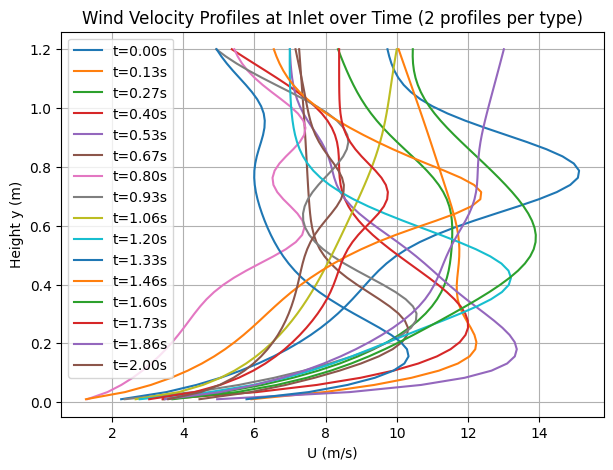

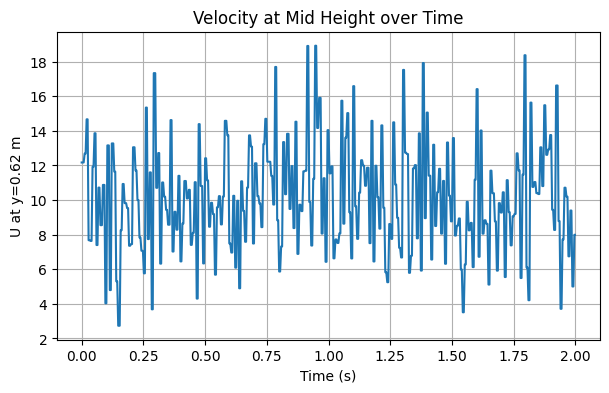

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(42)

# ==== 参数 ====
ny = 50
y = np.linspace(0.01, 1.2, ny)
dt = 0.002
T = 2.0
nt = int(T / dt)

update_interval = 0.008
transition_time = 0.004

# ==== 生成剖面参数 ====
def generate_profiles():
    U0 = 6.0 + 18.0 * np.random.rand(2)
    alpha = 0.1 + 0.3 * np.random.rand(2)
    h0 = 1.0 + 0.2 * np.random.rand(2)

    U1 = 6.0 + 18.0 * np.random.rand(2)
    beta = 0.4 + 0.6 * np.random.rand(2)
    h1 = 0.2 + 0.8 * np.random.rand(2)

    Uj = 4.0 + 14.0 * np.random.rand(2)
    yj = 0.1 + 0.9 * np.random.rand(2)
    sigma = 0.1 + 0.2 * np.random.rand(2)

    return U0, alpha, h0, U1, beta, h1, Uj, yj, sigma

# ==== 初始化 ====
params_new = generate_profiles()
w_new = np.ones(6) / 6
t_last = 0.0

# ---- 计算初始剖面 ----
U0, alpha, h0, U1, beta, h1, Uj, yj, sigma = params_new
base = np.zeros_like(y)
for i in range(2):
    base += w_new[i] * (U0[i] * (y / h0[i])**alpha[i])
for j in range(2):
    base += w_new[j+2] * (U1[j] * (y / h1[j])**beta[j] * np.exp(1.0 - y / h1[j]))
for k in range(2):
    base += w_new[k+4] * (Uj[k] * np.exp(-((y - yj[k]) / sigma[k])**2))

# ---- 设置旧剖面为初始剖面 ----
base_old = base.copy()
base_new = base.copy()

# ==== 存储结果 ====
U_profiles = np.zeros((nt, ny))

# ==== 时间循环 ====
for n in range(nt):
    t = n * dt

    # ---- 更新事件 ----
    if t - t_last >= update_interval:
        base_old = base.copy()  # ✅ 保存上一个剖面

        a = np.random.rand(6)
        w_new = (a**2) / np.sum(a**2)

        params_new = generate_profiles()

        # ---- 计算新剖面 ----
        U0, alpha, h0, U1, beta, h1, Uj, yj, sigma = params_new
        base_new = np.zeros_like(y)
        for i in range(2):
            base_new += w_new[i] * (U0[i] * (y / h0[i])**alpha[i])
        for j in range(2):
            base_new += w_new[j+2] * (U1[j] * (y / h1[j])**beta[j] * np.exp(1.0 - y / h1[j]))
        for k in range(2):
            base_new += w_new[k+4] * (Uj[k] * np.exp(-((y - yj[k]) / sigma[k])**2))

        t_last = t

    # ---- 平滑过渡整个剖面 ----
    lam = min((t - t_last) / transition_time, 1.0)
    base = (1 - lam) * base_old + lam * base_new

    U_profiles[n, :] = base

# ==== 绘图：抽取若干时间剖面 ====
plt.figure(figsize=(7, 5))
for idx in np.linspace(0, nt-1, 16, dtype=int):
    plt.plot(U_profiles[idx, :], y, label=f"t={idx*dt:.2f}s")
plt.xlabel("U (m/s)")
plt.ylabel("Height y (m)")
plt.title("Wind Velocity Profiles at Inlet over Time (2 profiles per type)")
plt.legend()
plt.grid(True)
plt.show()

# ==== 绘图：某一高度随时间变化 ====
plt.figure(figsize=(7, 4))
y_index = ny // 2
plt.plot(np.arange(nt)*dt, U_profiles[:, y_index])
plt.xlabel("Time (s)")
plt.ylabel(f"U at y={y[y_index]:.2f} m")
plt.title("Velocity at Mid Height over Time")
plt.grid(True)
plt.show()


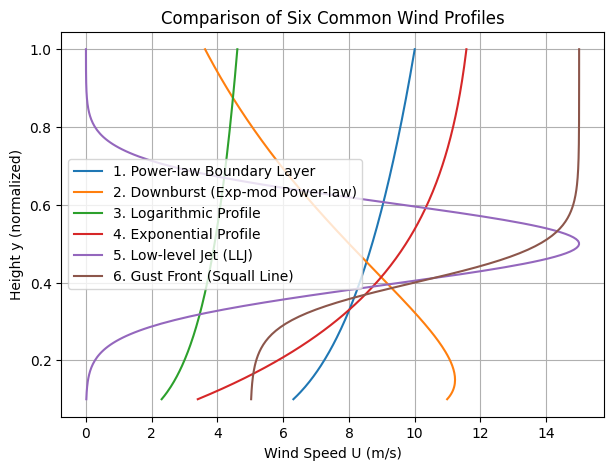

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# ==== 高度 y ====
y = np.linspace(0.1, 1.0, 200)  # 避免 y=0 以防对数报错

# ==== 1. 幂律边界层风剖面 ====
def power_law(y, U_ref=10, alpha=0.2, h_ref=1.0):
    return U_ref * (y / h_ref)**alpha

# ==== 2. 下击暴流剖面（指数修正幂律） ====
def downburst(y, U0=8, beta=0.3, h1=0.5):
    return U0 * (y / h1)**beta * np.exp(1.0 - y / h1)

# ==== 3. 对数风速剖面 ====
def log_profile(y, u_star=0.4, kappa=0.4, z0=0.01):
    return (u_star / kappa) * np.log(y / z0)

# ==== 4. 指数风速剖面 ====
def exponential_profile(y, Ug=12, hs=0.3):
    return Ug * (1 - np.exp(-y / hs))

# ==== 5. 低层急流（LLJ，高斯型） ====
def low_level_jet(y, Ug=15, yj=0.5, sigma=0.15):
    return Ug * np.exp(-((y - yj) / sigma)**2)

# ==== 6. Gust Front / Squall Line 剖面（双曲正切） ====
def gust_front(y, Umin=5, Umax=15, y0=0.4, delta=0.1):
    return Umin + (Umax - Umin) / 2 * (1 + np.tanh((y - y0) / delta))

# ==== 计算各剖面 ====
U1 = power_law(y)
U2 = downburst(y)
U3 = log_profile(y)
U4 = exponential_profile(y)
U5 = low_level_jet(y)
U6 = gust_front(y)

# ==== 绘图 ====
plt.figure(figsize=(7, 5))
plt.plot(U1, y, label="1. Power-law Boundary Layer")
plt.plot(U2, y, label="2. Downburst (Exp-mod Power-law)")
plt.plot(U3, y, label="3. Logarithmic Profile")
plt.plot(U4, y, label="4. Exponential Profile")
plt.plot(U5, y, label="5. Low-level Jet (LLJ)")
plt.plot(U6, y, label="6. Gust Front (Squall Line)")

plt.xlabel("Wind Speed U (m/s)")
plt.ylabel("Height y (normalized)")
plt.title("Comparison of Six Common Wind Profiles")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import meshio
mesh = meshio.read("/home/baoheng/OpenFOAM_study/UB_wind_tunnel_simulation_LES/0_test/processor0/VTK/processor0_0.001.vtk")
print(mesh.point_data.keys())  # 查看有哪些点数据
print(mesh.cell_data.keys())   # 查看有哪些单元数据

dict_keys([])
dict_keys(['cellID', 'U'])
